In [1]:
%matplotlib inline
from ztfquery import fields, query
from astropy import time
import datetime

In [8]:
fields_to_check = [1568, 522]

In [9]:
for field_number in fields_to_check:
    print(field_number, fields.has_field_reference(field_number))

1568 {'zg': True, 'zr': True, 'zi': False}
522 {'zg': True, 'zr': True, 'zi': True}


Check ZTF observations for the last month, to see where has been observed:

In [4]:
def get_zquery_partnership(start_date=None, end_date=None):
    
    date_format = "%Y-%m-%d"
    
    if start_date is None:
        now = datetime.datetime.now()
        last_month = now - datetime.timedelta(days=30)
        start_date = last_month.strftime(date_format)
    if end_date is None:
        now = datetime.datetime.now()
        end_date = now.strftime(date_format)
    

    # Convert to JD
    jd_start = time.Time(start_date).jd
    jd_end = time.Time(end_date).jd
    # Do the Query to see what exists
    zquery = query.ZTFQuery()
    zquery.load_metadata(sql_query="pid>1 and obsjd BETWEEN {0} AND {1}".format(jd_start, jd_end))# this will take about 1min
    zquery.show_gri_fields(title="ZTF observations in from {0} to {1}".format(start_date, end_date), grid="main")


/Users/avocado/anaconda2/envs/ampeltest/lib/python3.6/site-packages/ztfquery/metasearch.py:149: UserWarning: The query ran successfully, but no data returned. (bad query [check self.query_url]? wrong password [ztfquery.io._load_id_('irsa')] ?)
  warnings.warn("The query ran successfully, but no data returned. (bad query [check self.query_url]? wrong password [ztfquery.io._load_id_('irsa')] ?)")


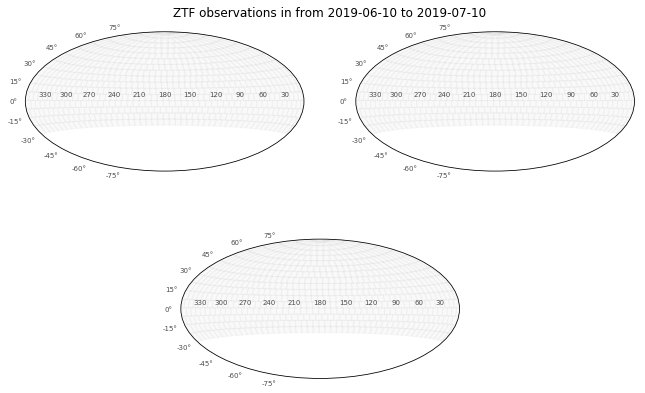

In [5]:
get_zquery_partnership()